In [24]:
import pandas as pd
import warnings

# data import
train_low_data = pd.read_csv('data/titanic/train.csv')
test_low_data = pd.read_csv('data/titanic/test.csv')
# gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [25]:
train_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
test_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [27]:
# test_low_data PassengerId를 따로 저장(후에 predict를 위해)
test_passenger_ids = test_low_data['PassengerId']

In [28]:
train_low_data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test_low_data.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
train_low_data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### test set에는 Survived 항목이 없음, 이 부분을 예측하는게 목표


In [33]:
test_low_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


속성 정보
=========
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### (한글로 정리) 
<!-- 강제 줄바꿈은 space 두번 -->
Survived - 생존 여부 (0 = 사망, 1 = 생존)  
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
Sex - 성별  
Age - 나이  
SibSp - 함께 탑승한 자녀 / 배우자 의 수  
Parch - 함께 탑승한 부모님 / 아이들 의 수  
Ticket - 티켓 번호  
Fare - 탑승 요금  
Cabin - 수하물 번호  
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [34]:
print(train_low_data.shape)
print(test_low_data.shape) #Survived 항목외에는 동일

(891, 12)
(418, 11)


In [35]:
train_low_data['Sex_clean'] = train_low_data['Sex'].astype('category').cat.codes
test_low_data['Sex_clean'] = test_low_data['Sex'].astype('category').cat.codes

In [36]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Embarked

In [37]:
print(train_low_data['Embarked'].isnull().sum())
print(test_low_data['Embarked'].isnull().sum())
print(train_low_data['Embarked'].value_counts())

2
0
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [38]:
train_low_data.loc[:, 'Embarked'] = train_low_data['Embarked'].fillna("S")
test_low_data.loc[:, 'Embarked'] = test_low_data['Embarked'].fillna("S")

train_low_data['Embarked_clean'] = train_low_data['Embarked'].astype('category').cat.codes
test_low_data['Embarked_clean'] = test_low_data['Embarked'].astype('category').cat.codes

In [39]:
train_low_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


동승자

In [40]:
train_low_data['Family'] = 1 + train_low_data['SibSp'] + train_low_data['Parch']
test_low_data['Family'] = 1 + test_low_data['SibSp'] + test_low_data['Parch']

In [41]:
train_low_data['Solo'] = train_low_data['Family'] == 1
test_low_data['Solo'] = test_low_data['Family'] == 1

In [42]:
train_low_data['Solo'] = train_low_data['Solo'].map(lambda x : 1 if x else 0)
test_low_data['Solo'] = test_low_data['Solo'].map(lambda x : 1 if x else 0)
train_low_data['Solo']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Solo, Length: 891, dtype: int64

요금

In [43]:
train_low_data['FareBin'] = pd.qcut(train_low_data['Fare'], 5)
test_low_data['FareBin'] = pd.qcut(test_low_data['Fare'], 5)

print(train_low_data['FareBin'].value_counts())

FareBin
(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: count, dtype: int64


In [44]:
train_low_data['Fare_clean'] = train_low_data['FareBin'].astype('category').cat.codes
test_low_data['Fare_clean'] = test_low_data['FareBin'].astype('category').cat.codes

train_low_data['Fare_clean'].value_counts()

Fare_clean
1    184
3    180
0    179
4    176
2    172
Name: count, dtype: int64

이름

In [53]:
train_low_data['Title'] = train_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_low_data['Title'] = test_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_low_data['Title'] = train_low_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Other')
test_low_data['Title'] = test_low_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Other')

train_low_data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      23
Mlle        2
Mme         1
Ms          1
Name: count, dtype: int64

In [54]:
train_low_data['Title'] = train_low_data['Title'].replace('Mlle', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Ms', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Mme', 'Mrs')

train_low_data['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

In [56]:
test_low_data['Title'] = test_low_data['Title'].replace('Mlle', 'Miss')
test_low_data['Title'] = test_low_data['Title'].replace('Ms', 'Miss')
test_low_data['Title'] = test_low_data['Title'].replace('Mme', 'Mrs')

test_low_data['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: count, dtype: int64

In [57]:
train_low_data['Title_clean'] = train_low_data['Title'].astype('category').cat.codes
test_low_data['Title_clean'] = test_low_data['Title'].astype('category').cat.codes

나이

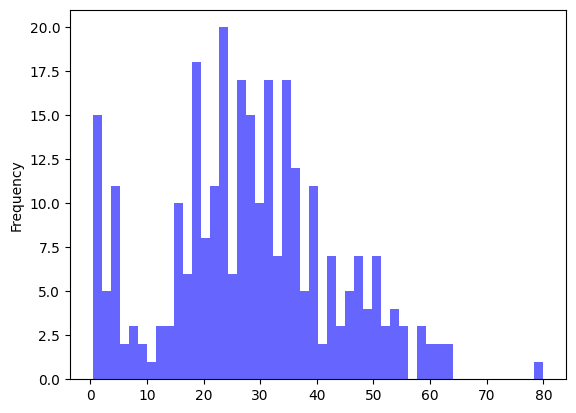

In [58]:
import matplotlib.pyplot as plt
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Age"].plot.hist(alpha=.6, color='blue', bins=50)
plt.show()

In [59]:
train_low_data['Age'] = train_low_data['Age'].fillna(train_low_data.groupby("Title")["Age"].
                                                     transform("median"))
test_low_data['Age'] = test_low_data['Age'].fillna(train_low_data.groupby("Title")["Age"].
                                                     transform("median"))

In [60]:
#train_low_data
train_low_data.loc[   train_low_data['Age'] <= 10, 'Age_clean'] = 0
train_low_data.loc[(  train_low_data['Age'] > 10) & (  train_low_data['Age'] <= 16), 'Age_clean'] = 1
train_low_data.loc[(  train_low_data['Age'] > 16) & (  train_low_data['Age'] <= 20), 'Age_clean'] = 2
train_low_data.loc[(  train_low_data['Age'] > 20) & (  train_low_data['Age'] <= 26), 'Age_clean'] = 3
train_low_data.loc[(  train_low_data['Age'] > 26) & (  train_low_data['Age'] <= 30), 'Age_clean'] = 4
train_low_data.loc[(  train_low_data['Age'] > 30) & (  train_low_data['Age'] <= 36), 'Age_clean'] = 5
train_low_data.loc[(  train_low_data['Age'] > 36) & (  train_low_data['Age'] <= 40), 'Age_clean'] = 6
train_low_data.loc[(  train_low_data['Age'] > 40) & (  train_low_data['Age'] <= 46), 'Age_clean'] = 7
train_low_data.loc[(  train_low_data['Age'] > 46) & (  train_low_data['Age'] <= 50), 'Age_clean'] = 8
train_low_data.loc[(  train_low_data['Age'] > 50) & (  train_low_data['Age'] <= 60), 'Age_clean'] = 9
train_low_data.loc[   train_low_data['Age'] > 60, 'Age_clean'] = 10

#test_low_data
test_low_data.loc[ test_low_data['Age'] <= 10, 'Age_clean'] = 0
test_low_data.loc[(test_low_data['Age'] > 10) & (test_low_data['Age'] <= 16), 'Age_clean'] = 1
test_low_data.loc[(test_low_data['Age'] > 16) & (test_low_data['Age'] <= 20), 'Age_clean'] = 2
test_low_data.loc[(test_low_data['Age'] > 20) & (test_low_data['Age'] <= 26), 'Age_clean'] = 3
test_low_data.loc[(test_low_data['Age'] > 26) & (test_low_data['Age'] <= 30), 'Age_clean'] = 4
test_low_data.loc[(test_low_data['Age'] > 30) & (test_low_data['Age'] <= 36), 'Age_clean'] = 5
test_low_data.loc[(test_low_data['Age'] > 36) & (test_low_data['Age'] <= 40), 'Age_clean'] = 6
test_low_data.loc[(test_low_data['Age'] > 40) & (test_low_data['Age'] <= 46), 'Age_clean'] = 7
test_low_data.loc[(test_low_data['Age'] > 46) & (test_low_data['Age'] <= 50), 'Age_clean'] = 8
test_low_data.loc[(test_low_data['Age'] > 50) & (test_low_data['Age'] <= 60), 'Age_clean'] = 9
test_low_data.loc[ test_low_data['Age'] > 60, 'Age_clean'] = 10

In [61]:
train_low_data['Cabin'].str[:1].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [62]:
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

train_low_data['Cabin_clean'] = train_low_data['Cabin'].str[:1]
train_low_data['Cabin_clean'] = train_low_data['Cabin_clean'].map(mapping)

test_low_data['Cabin_clean'] = test_low_data['Cabin'].str[:1]
test_low_data['Cabin_clean'] = test_low_data['Cabin_clean'].map(mapping)


<function matplotlib.pyplot.show(close=None, block=None)>

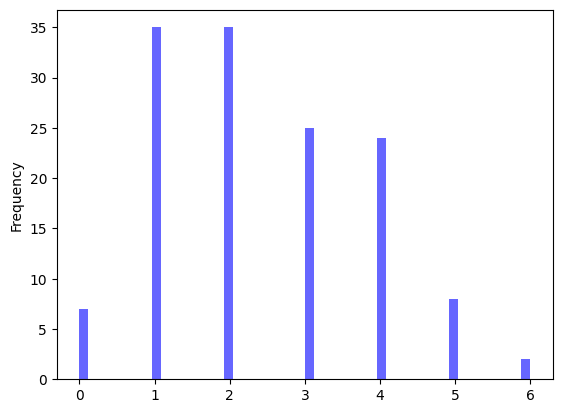

In [63]:
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Cabin_clean"].plot.hist(alpha=0.6, color = 'blue', bins=50)
plt.show

cabin


In [64]:
train_low_data['Cabin_clean'] = train_low_data.groupby('Pclass')['Cabin_clean'].transform(lambda x: x.fillna(x.median()))
test_low_data['Cabin_clean'] = test_low_data.groupby('Pclass')['Cabin_clean'].transform(lambda x: x.fillna(x.median()))

In [65]:
print(train_low_data['Cabin_clean'].value_counts())
print(test_low_data['Cabin_clean'].value_counts())

Cabin_clean
5.0    492
4.5    168
2.0     99
1.0     47
3.0     33
4.0     32
0.0     15
6.0      4
7.0      1
Name: count, dtype: int64
Cabin_clean
5.0    308
2.0     62
1.0     18
3.0     13
4.0      9
0.0      7
6.0      1
Name: count, dtype: int64


In [66]:
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'Family',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean',
    'Fare_clean',
]

label = [
    'Survived',
]

In [68]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_ = train_low_data[feature]
Y_ = train_low_data[label]

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=1)

In [69]:
X_train

,Pclass,SibSp,Parch,Sex_clean,Embarked_clean,Family,Solo,Title_clean,Age_clean,Cabin_clean,Fare_clean
301,3,2,0,1,1,3,0,2,4.0,5.0,3
309,1,0,0,0,0,1,1,1,4.0,4.0,4
516,2,0,0,0,2,1,1,3,5.0,5.0,1
120,2,2,0,1,2,3,0,2,3.0,4.5,4
570,2,0,0,1,2,1,1,2,10.0,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...
715,3,0,0,1,2,1,1,2,2.0,5.0,0
767,3,0,0,0,1,1,1,1,5.0,5.0,0
72,2,0,0,1,2,1,1,2,3.0,4.5,4
235,3,0,0,0,2,1,1,1,3.0,5.0,0


In [70]:
Y_train

,Survived
301,1
309,1
516,1
120,0
570,1
...,...
715,0
767,0
72,0
235,0


In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성

model = Sequential()
#input_shape=(11,)은 각 입력 샘플이 11개의 특성(feature)을 가지고 있음을 의미
model.add(Dense(256, input_shape=(11,), activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))


'''
model.add(Dense(16, input_shape=(None ,11), activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
'''

'''
model.add(Dense(1, input_shape=(None ,11), activation = "sigmoid"))
'''
# 모델 Compile
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
    loss = "binary_crossentropy",
    metrics=["accuracy"])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6077 - loss: 0.6424 - val_accuracy: 0.6760 - val_loss: 0.5532
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7883 - loss: 0.4955 - val_accuracy: 0.8045 - val_loss: 0.4859
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.4233 - val_accuracy: 0.6927 - val_loss: 0.5955
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7734 - loss: 0.5191 - val_accuracy: 0.7263 - val_loss: 0.5401
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.4245 - val_accuracy: 0.6983 - val_loss: 0.6488
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.4649 - val_accuracy: 0.8101 - val_loss: 0.5434
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8092 - loss: 0.4617 - val_accuracy: 0.7374 - val_loss: 0.5278
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8402 - loss: 0.3862 - val_accuracy: 0.7709 - v

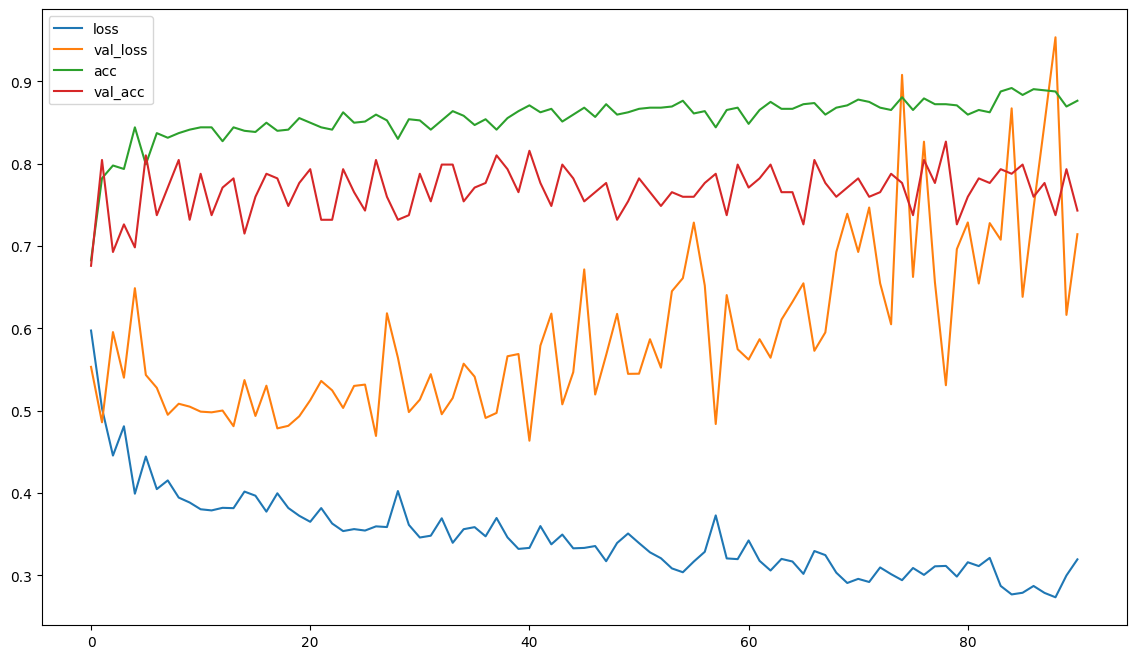

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, callbacks=[early_stopping_callback, model_checkpoint_callback])


plt.figure(figsize=(14,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [73]:
test_data = test_low_data[feature]
test_data

,Pclass,SibSp,Parch,Sex_clean,Embarked_clean,Family,Solo,Title_clean,Age_clean,Cabin_clean,Fare_clean
0,3,0,0,1,1,1,1,2,5.0,5.0,1
1,3,1,0,0,2,2,0,3,8.0,5.0,0
2,2,0,0,1,1,1,1,2,10.0,5.0,1
3,3,0,0,1,2,1,1,2,4.0,5.0,1
4,3,1,1,0,2,3,0,3,3.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,2,1,1,2,4.0,5.0,1
414,1,0,0,0,0,1,1,4,6.0,2.0,4
415,3,0,0,1,2,1,1,2,6.0,5.0,0
416,3,0,0,1,2,1,1,2,5.0,5.0,1


In [74]:
prediction = model.predict(test_data)
prediction

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.34835020e-01],
       [1.01971537e-01],
       [2.17374731e-02],
       [1.15645491e-01],
       [1.92054510e-01],
       [9.73058790e-02],
       [3.67681116e-01],
       [8.70051682e-02],
       [9.98604059e-01],
       [3.07851229e-02],
       [9.64538753e-02],
       [3.60721231e-01],
       [9.99999821e-01],
       [8.06361735e-02],
       [9.90782976e-01],
       [9.97844040e-01],
       [1.93683937e-01],
       [1.93788096e-01],
       [1.52485654e-01],
       [9.32425678e-01],
       [4.41040993e-01],
       [9.99857426e-01],
       [9.99997199e-01],
       [1.07104070e-01],
       [9.99999702e-01],
       [5.30314036e-02],
       [1.00000000e+00],
       [1.93788096e-01],
       [2.51861602e-01],
       [9.55777690e-02],
       [1.12414226e-01],
       [2.99367998e-02],
       [2.39228696e-01],
       [3.60316396e-01],
       [5.20508349e-01],
       [2.68745780e-01],
       [2.11088061e-01],
       [1.94344804e-01],
       [9.64538753e-02],
       [8.11413452e-02],


In [75]:
# 가장 좋은 모델 불러오기
model.load_weights('best_model.keras')

test_data = test_low_data[feature]
predict = model.predict(test_data)
predicted = tf.cast(predict > 0.5, dtype=tf.int32)
predicted = predicted.numpy()
#cast_f = lambda x:0 if x>=0.5 else 1
#predict = predict.apply(cast_f)

result =pd.DataFrame({'PassengerId': test_low_data['PassengerId'],'Survived': predicted.flatten()})
result.to_csv('result.csv', index=False)

'''
test_data = test_low_data[feature]
prediction = model.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test_low_data["PassengerId"],
        "Survived": prediction
    })
 
submission.to_csv('submission_test1.csv', index=False)
submission = pd.read_csv('submission_test1.csv')
submission.head()
'''

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


'\ntest_data = test_low_data[feature]\nprediction = model.predict(test_data)\nsubmission = pd.DataFrame({\n        "PassengerId": test_low_data["PassengerId"],\n        "Survived": prediction\n    })\n \nsubmission.to_csv(\'submission_test1.csv\', index=False)\nsubmission = pd.read_csv(\'submission_test1.csv\')\nsubmission.head()\n'